In [47]:
import json
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
Names = {"10": "Article", "12": "Aux. verb", "18": "Conjunction", "16": "Adverb", \
         "3": "Pers. pron.", "9": "Indef. pron.", "17": "Preposition", "20": "Quantifier"}

In [4]:
list(Names.values())

['Pers. pron.',
 'Preposition',
 'Conjunction',
 'Adverb',
 'Aux. verb',
 'Quantifier',
 'Indef. pron.',
 'Article']

In [5]:
markers = []
for a in range(3):
    markers.append("Aggregated %d"%(a+1))
for x in ['Quantifier','Conjunction','Indef. pron.',\
 'Adverb','Aux. verb','Article','Pers. pron.',\
 'Preposition']:
    markers.append(x)

In [6]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = list(np.floor(np.random.rand(n)*len(X)).astype(int))
    X_resample = np.array(X)[resample_i]
    return X_resample

In [7]:
def get_data(where):

    with open("data/coordination_on_%s.json"%(where), "r") as f:
         c_o = json.load(f)

    markers = c_o.keys()
    all_users = len(c_o['18'])
    average = {}
    ret = {}
    for m in markers:
        average[m] = np.mean([c for c in c_o[m] if c])
        print(m, np.mean([c for c in c_o[m] if c]), len(c_o[m]))
        ret[Names[m]] = [c for c in c_o[m] if c]
    aggregated = [[], [], []]
    for x in range(all_users):
        cur = []
        cur_2 = []
        cur_3 = []
        valid = 1
        for m in markers:
            if c_o[m][x] == None:
                valid = 0
                cur_2.append(average[m])
            else:
                cur.append(c_o[m][x])
                cur_2.append(c_o[m][x])
                cur_3.append(c_o[m][x])
        if valid:
            aggregated[0].append(np.mean(cur))
        if len(cur) > 0:
            aggregated[1].append(np.mean(cur_2))
            aggregated[2].append(np.mean(cur_3))
    for a in range(3):
        ret['Aggregated %d'%(a+1)] = aggregated[a]
        print(a, np.mean(aggregated[a]), len(aggregated[a]))
    return ret

In [53]:
def get_data(where, what):

    coordination = defaultdict(list)
    utterances = defaultdict(int)
    target_and_speaker = {m: defaultdict(int) for m in Names.keys()}
    speaker = {m: defaultdict(int) for m in Names.keys()}
    target = {m: defaultdict(int) for m in Names.keys()}
    with open("data/%s_coord.json"%(where), "r") as f:
         for line in f:
            data = json.loads(line)
            if not(data['page_title'].startswith(what)):
                continue
            user = data['user_text']
            for m in Names.keys(): 
                t,s = data[m]
                ts = int(t and s) 
                target_and_speaker[m][user] += ts
                target[m][user] += t
                speaker[m][user] += s
            utterances[user] += 1        
    for user in utterances.keys():
        for m in Names.keys():
            try:
                assert(speaker[m][user] >= 3)
                tmp = target_and_speaker[m][user] / target[m][user] - speaker[m][user] / utterances[user]
            except:
                tmp = None
            coordination[m].append(tmp)

    markers = Names.keys()
    all_users = len(utterances.keys())
    average = {}
    ret = {}
    for m in markers:
        average[m] = np.mean([c for c in coordination[m] if c])
        print(m, np.mean([c for c in coordination[m] if c]), len(coordination[m]))
        ret[Names[m]] = [c for c in coordination[m] if c]
    aggregated = [[], [], []]
    user_list = [[], []]
    for x in range(all_users):
        cur = []
        cur_2 = []
        cur_3 = []
        valid = 1
        for m in markers:
            if coordination[m][x] == None:
                valid = 0
                cur_2.append(average[m])
            else:
                cur.append(coordination[m][x])
                cur_2.append(coordination[m][x])
                cur_3.append(coordination[m][x])
        if valid:
            aggregated[0].append(np.mean(cur))
            user_list[0].append(x)
        if len(cur) > 0:
            aggregated[1].append(np.mean(cur_2))
            aggregated[2].append(np.mean(cur_3))
            user_list[1].append(x)
    for a in range(3):
        ret['Aggregated %d'%(a+1)] = aggregated[a]
        print(a, np.mean(aggregated[a]), len(aggregated[a]))
    return ret, user_list[0], user_list[1]

In [54]:
data = {}
users = {"own":[[], []], "others_user":[[], []], "others_article":[[], []]}
data["own"], users["own"][0], users["own"][1] = get_data("own_page", "User talk")
data["others_user"], users["others_user"][0], users["others_user"][1] = get_data("reply_on_others", "User talk")
data["others_article"], users['others_article'][0], users["others_article"][1] = get_data("reply_on_others", "Talk")

3 0.026117999322684323 4019
17 0.02004875678566464 4019
18 0.04380431156054099 4019
16 0.040265975247970376 4019
12 0.03574753216136462 4019
20 0.04989822147165337 4019
9 0.04189310222328749 4019
10 0.03548138771274281 4019
0 0.03428691602508395 3147
1 0.034043827151663174 3559
2 0.03264097114646469 3559
3 -0.02655892841392331 5154
17 -0.011455093566607549 5154
18 -0.02622468246053288 5154
16 0.0553581390634963 5154
12 -0.010650501016732287 5154
20 0.0811884046128917 5154
9 0.036057293786015285 5154
10 0.009276007034208918 5154
0 0.014016951800320802 4352
1 0.013360611367393464 4738
2 0.012278515691483869 4738
3 0.03437991516979621 5252
17 0.010263080512932891 5252
18 0.025829799162821604 5252
16 0.02835784162559718 5252
12 0.01568785783595939 5252
20 0.03334027243945758 5252
9 0.020796698745263378 5252
10 0.017061327697376345 5252
0 0.022831569264758666 4805
1 0.022506008353585964 5020
2 0.02248555001320598 5020


In [55]:
all_users = [[], []]
for r in [0, 1]:
    all_users[r] = list(set(users["own"][r])&set(users["others_user"][r])&set(users["others_article"][r]))

In [56]:
def get_data(where, what, who):

    coordination = defaultdict(list)
    utterances = defaultdict(int)
    target_and_speaker = {m: defaultdict(int) for m in Names.keys()}
    speaker = {m: defaultdict(int) for m in Names.keys()}
    target = {m: defaultdict(int) for m in Names.keys()}
    with open("data/%s_coord.json"%(where), "r") as f:
         for line in f:
            data = json.loads(line)
            if not(data['page_title'].startswith(what)):
                continue
            user = data['user_text']
            for m in Names.keys(): 
                t,s = data[m]
                ts = int(t and s) 
                target_and_speaker[m][user] += ts
                target[m][user] += t
                speaker[m][user] += s
            utterances[user] += 1        
    for user in utterances.keys():
        for m in Names.keys():
            try:
                assert(speaker[m][user] >= 3)
                tmp = target_and_speaker[m][user] / target[m][user] - speaker[m][user] / utterances[user]
            except:
                tmp = None
            coordination[m].append(tmp)

    markers = Names.keys()
    all_users = len(utterances.keys())
    average = {}
    ret = {}
    for m in markers:
        average[m] = np.mean([c for c in coordination[m] if c])
        print(m, np.mean([c for c in coordination[m] if c]), len(coordination[m]))
        ret[Names[m]] = [c for c in coordination[m] if c]
    aggregated = [[], [], []]
    user_list = [[], []]
    for x in range(all_users):
        cur = []
        cur_2 = []
        cur_3 = []
        valid = 1
        for m in markers:
            if coordination[m][x] == None:
                valid = 0
                cur_2.append(average[m])
            else:
                cur.append(coordination[m][x])
                cur_2.append(coordination[m][x])
                cur_3.append(coordination[m][x])
        if valid and (x in who[0]):
            aggregated[0].append(np.mean(cur))
            user_list[0].append(x)
        if len(cur) > 0 and (x in who[1]):
            aggregated[1].append(np.mean(cur_2))
            aggregated[2].append(np.mean(cur_3))
            user_list[1].append(x)
    for a in range(3):
        ret['Aggregated %d'%(a+1)] = aggregated[a]
        print(a, np.mean(aggregated[a]), len(aggregated[a]))
    return ret

In [57]:
data = {}
data["own"] = get_data("own_page", "User talk", all_users)
data["others_user"] = get_data("reply_on_others", "User talk", all_users)
data["others_article"] = get_data("reply_on_others", "Talk", all_users)

3 0.026117999322684323 4019
17 0.02004875678566464 4019
18 0.04380431156054099 4019
16 0.040265975247970376 4019
12 0.03574753216136462 4019
20 0.04989822147165337 4019
9 0.04189310222328749 4019
10 0.03548138771274281 4019
0 0.034046204650122876 2425
1 0.033919964399312004 3130
2 0.03228290710877541 3130
3 -0.02655892841392331 5154
17 -0.011455093566607549 5154
18 -0.02622468246053288 5154
16 0.0553581390634963 5154
12 -0.010650501016732287 5154
20 0.0811884046128917 5154
9 0.036057293786015285 5154
10 0.009276007034208918 5154
0 0.014793818368959332 2425
1 0.014281130454862737 3130
2 0.013169227995589386 3130
3 0.03437991516979621 5252
17 0.010263080512932891 5252
18 0.025829799162821604 5252
16 0.02835784162559718 5252
12 0.01568785783595939 5252
20 0.03334027243945758 5252
9 0.020796698745263378 5252
10 0.017061327697376345 5252
0 0.023678477326848753 2425
1 0.023065090261037664 3130
2 0.02273530798892374 3130


In [58]:
display_name = []
for ind, m in enumerate(markers):
    s, p = scipy.stats.f_oneway(data["own"][m], data["others_user"][m], data["others_article"][m])
    print(m, s, p)
    n = m
    #if p < 0.05:
    #    n += "*"
    #if p < 0.01:
    #    n += "*"
    #if p < 0.001:
    #    n += "*"
    display_name.append(n)

Aggregated 1 66.62024904484694 2.133334038400425e-29
Aggregated 2 82.7770727979966 2.31051466874032e-36
Aggregated 3 61.286291545278246 3.597306614468564e-27
Quantifier 171.97438181840164 2.1992038876681204e-74
Conjunction 423.45400956591715 1.4728031373735067e-178
Indef. pron. 40.11792768804375 4.303128129318539e-18
Adverb 62.015076488978494 1.591268612160213e-27
Aux. verb 278.1483876904983 8.21777347264371e-119
Article 72.6083398520377 4.495662897910392e-32
Pers. pron. 562.2881787274329 3.15105818294798e-234
Preposition 208.96412194897826 6.807835285455082e-90


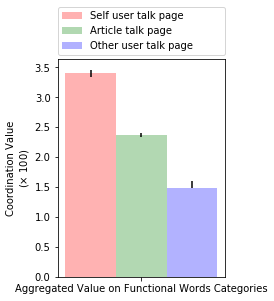

In [93]:
f = plt.figure(figsize=(2,15))
N = len(markers[:1])
all_data = {}
err = {}
for x in ["own", "others_article", "others_user"]:
    all_data[x] = [np.mean(data[x][m])*100 for m in markers][:1]
    err[x] = [[], []]
resample = 20
for ind,m in enumerate(markers[:1]):
    lst = {}
    for x in ["own", "others_article", "others_user"]:
        lst[x] = []
        for r in range(resample):
            tmp = bootstrap_resample(data[x][m])
            tmp = np.mean(tmp)*100
            lst[x].append(tmp)
        l, u = scipy.stats.t.interval(0.95, len(lst[x])-1, loc=np.mean(lst[x]), scale=scipy.stats.sem(lst[x]))
        err[x][0].append(all_data[x][ind]-l)
        err[x][1].append(u - all_data[x][ind])
ind = [np.arange(N)]  # the x locations for the groups
width = 0.3       # the width of the bars
ind.append(ind[0] + width)
ind.append(ind[1] + width)

color = ["r", "g", "b"]
fig, ax = plt.subplots(figsize=(3, 4))
rect = []
for i, x in enumerate(["own", "others_article", "others_user"]):
    rect.append(ax.bar(ind[i], all_data[x], width, color=color[i], yerr=err[x], alpha=0.3))
# add some text for labels, title and axes ticks
ax.set_ylabel('Coordination Value\n(%s 100)'%(r"$\times$"))
ax.set_xticks(ind[1])
ax.set_xticklabels(display_na)
ax.legend((rect[0][0], rect[1][0], rect[2][0]), ('Self user talk page', 'Article talk page', \
                                                 'Other user talk page'), bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           mode="expand", borderaxespad=0., ncol=1)

plt.show()
fig.savefig("figs/coordination.pdf", bbox_inches='tight')

In [65]:
import pandas as pd
import matplotlib.ticker as mtick

In [301]:
df = pd.DataFrame({"Toxic": [28, 4, 6, 9, 4], "Normal": [3, 3, 5, 8, 3], "Severe Toxic": [86, 1, 1, 1, 1]})

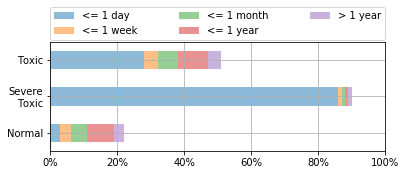

In [95]:
ax = df.T.plot(kind='barh', stacked=True, figsize=(6, 2), alpha=0.5,  edgecolor='none', linewidth=0)
plt.legend(["<= 1 day", "<= 1 week", "<= 1 month", "<= 1 year", "> 1 year"], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.grid(True)
plt.xlim((0, 100))
plt.savefig("toxic-deletion.pdf", bbox_inches='tight')

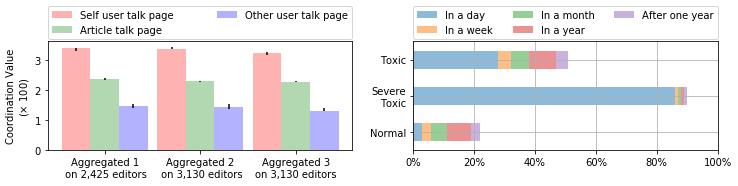

In [86]:
N = len(markers[:3])
all_data = {}
err = {}
for x in ["own", "others_article", "others_user"]:
    all_data[x] = [np.mean(data[x][m])*100 for m in markers][:3]
    err[x] = [[], []]
resample = 20
for ind,m in enumerate(markers[:3]):
    lst = {}
    for x in ["own", "others_article", "others_user"]:
        lst[x] = []
        for r in range(resample):
            tmp = bootstrap_resample(data[x][m])
            tmp = np.mean(tmp)*100
            lst[x].append(tmp)
        l, u = scipy.stats.t.interval(0.95, len(lst[x])-1, loc=np.mean(lst[x]), scale=scipy.stats.sem(lst[x]))
        err[x][0].append(all_data[x][ind]-l)
        err[x][1].append(u - all_data[x][ind])
ind = [np.arange(N)]  # the x locations for the groups
width = 0.3       # the width of the bars
ind.append(ind[0] + width)
ind.append(ind[1] + width)

color = ["r", "g", "b"]
fig, axes = plt.subplots(nrows=1, ncols=2)
#fig, ax = plt.subplots(figsize=(6, 2))
ax = axes[0]
rect = []
for i, x in enumerate(["own", "others_article", "others_user"]):
    rect.append(ax.bar(ind[i], all_data[x], width, color=color[i], yerr=err[x], alpha=0.3))
# add some text for labels, title and axes ticks
ax.set_ylabel('Coordination Value\n(%s 100)'%(r"$\times$"))
ax.set_xticks(ind[1])
ax.set_xticklabels(["Aggregated 1\n on 2,425 editors", "Aggregated 2\n on 3,130 editors", "Aggregated 3\non 3,130 editors"])
ax.legend((rect[0][0], rect[1][0], rect[2][0]), ('Self user talk page', 'Article talk page', \
                                                 'Other user talk page'), bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           mode="expand", borderaxespad=0., ncol=2)

df = pd.DataFrame({"Toxic": [28, 4, 6, 9, 4], "Normal": [3, 3, 5, 8, 3], "Severe\nToxic": [86, 1, 1, 1, 1]})
ax = df.T.plot(kind='barh', stacked=True, figsize=(12, 2), alpha=0.5,  edgecolor='none', linewidth=0, ax=axes[1])
ax.legend(["In a day", "In a week", "In a month", "In a year", "After one year"], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.grid(True)
ax.set_xlim((0, 100))
plt.savefig("figs/usecase.pdf", bbox_inches='tight')